# 3-qubit circuit walkthrough

This notebook builds a simple 3-qubit circuit using several gate types, draws the circuit, and simulates measurement outcomes.


This notebook, was created using ai, and also is planning to run it, under conda Env Called "qiskit23"
using python 3.11 + qiskit 2.3
12122025 by caraquel
Qiskit version installed for this conda env is: 2.2.3
Qiskit Aer version: 0.17.2
Qiskit IBM Runtime version: 0.43.1


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

qc = QuantumCircuit(3, 3)

# Superposition on qubit 0
qc.h(0)

# Prepare qubit 1 in |1>
qc.x(1)

# Entangle qubit 0 -> qubit 2
qc.cx(0, 2)


In [ ]:
# operations on qubit 2
# Rotate qubit 2 around Y-axis by pi/4
qc.ry(3.14159/4, 2)

# Controlled-Z between qubit 1 and qubit 2
qc.cz(1, 2)

# Add a barrier to visually separate preparation from measurement
qc.barrier()

# Measure all qubits into classical bits
qc.measure([0, 1, 2], [0, 1, 2])

qc.draw("text")

┌───┐                       ░ ┌─┐      
q_0: ┤ H ├──■────────────────────░─┤M├──────
     ├───┤  │                    ░ └╥┘┌─┐   
q_1: ┤ X ├──┼─────────────────■──░──╫─┤M├───
     └───┘┌─┴─┐┌────────────┐ │  ░  ║ └╥┘┌─┐
q_2: ─────┤ X ├┤ Ry(0.7854) ├─■──░──╫──╫─┤M├
          └───┘└────────────┘    ░  ║  ║ └╥┘
c: 3/═══════════════════════════════╩══╩══╩═
                                    0  1  2

The circuit above uses:
- Hadamard H to create superposition on qubit 0.
- Pauli-X to flip qubit 1 to |1>.
- CNOT to entangle qubit 0 with qubit 2.
- RY rotation to add a continuous parameter on qubit 2.
- Controlled-Z to add phase entanglement between qubits 1 and 2.
- Barrier for readability, then measure all qubits.


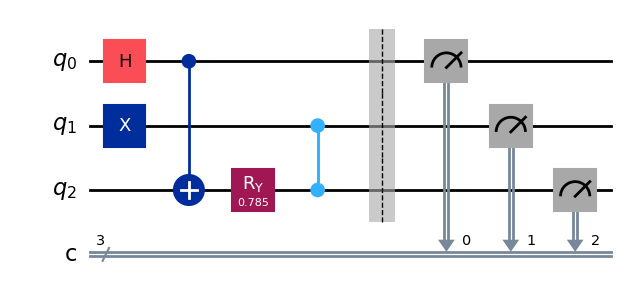

In [ ]:
# Visualize the circuit with matplotlib (if available)
qc.draw("mpl")
# Use Aer's simulator
simulator = AerSimulator()

In [ ]:
# Simulate the circuit
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()
counts = result.get_counts()
counts


{'111': 899, '110': 147, '010': 852, '011': 150}

**Purpose: AerSimulator()** is Qiskit Aer’s unified local simulator class. It executes quantum circuits on a classical machine to produce statevectors, unitary matrices, or sampled measurement outcomes (counts), depending on configuration.

In [ ]:
# Example: AerSimulator in 'statevector' vs default (sampling) modes
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Small demonstration circuit (2 qubits)
demo_qc = QuantumCircuit(2, 2)
demo_qc.h(0)
demo_qc.cx(0,1)
demo_qc.measure([0,1],[0,1])

# 1) Statevector mode (deterministic state amplitudes) - remove measurements for statevector
demo_sv_qc = QuantumCircuit(2)
demo_sv_qc.h(0)
demo_sv_qc.cx(0,1)
sv_sim = AerSimulator(method='statevector')
tqc = transpile(demo_sv_qc, sv_sim)
sv = sv_sim.run(tqc).result().get_statevector(tqc)
print('Statevector (amplitudes):')
print(sv)

# 2) Sampling (qasm) mode - uses measurements and returns counts
qasm_sim = AerSimulator()  # default sampling/qasm mode
tqc2 = transpile(demo_qc, qasm_sim)
res = qasm_sim.run(tqc2, shots=1024).result()
counts = res.get_counts()
print('
Counts (sampling, 1024 shots):')
print(counts)

# Notes: use method='statevector' for fidelity/kernel computations, and default (qasm) for measurement statistics.

The counts dictionary shows how often each bitstring appeared over the specified shots. Because the circuit mixes superposition, entanglement, and rotations, you should see probability spread across multiple outcomes rather than a single deterministic result.
